# Actividad: Diferencia entre Medias Poblacionales

> Alfonso Pineda Cedillo | A01660394

**Fecha de entrega:** 28 de Agosto de 2023

---

**Instrucciones**

Resuleve los siguientes problemas en Python:

> **Problema 1:**  
Un científico de datos está analizando los niveles de sódio en dos lotes diferentes de un mismo producto. El científico quiere determinar si los niveles de sódio son iguales para ambos lotes, por lo tanto, recabó las siguientes dos muestras de datos  

>> Lote A -(número de muestras 15): Nivel de Sodio (mg) $\longrightarrow$ 180, 160, 170, 190, 200, 175, 185, 195, 180, 170, 190, 185, 200, 175, 165  
Lote B - (número de muestras 20): Nivel de Sodio (mg) $\longrightarrow$ 210, 215, 220, 225, 230, 215, 220, 225, 230, 235, 210, 215, 220, 225, 230, 215, 220, 225, 230, 23

> La varianza poblacional para el lote A es 57.05 y para el lote B  34.63. Con un nivel del confianza del 85% determina si ambos lotes tienen en promedio el mismo nivel de sódio.

> **Problema 4:**  
Se han tomado dos muestras del número de días que tardan los egresados de las universidades A y B en encontrar trabajo  

>> Universidad A: $\longrightarrow$ 180, 200, 190, 210, 175, 185, 195, 180, 205, 190, 200, 185, 210, 175, 195  
Universidad B: $\longrightarrow$ 210, 215, 220, 225, 230, 215, 220, 225, 230, 235, 210, 215, 220, 225, 230, 235

> Utilizando un nivel de confianza del 95%, determina si hay evidencia estadística suficiente para concluir que existe una diferencia significativa en el tiempo promedio de busqueda de empleo entre ambas universidades.

---



## Solución
Considerando que ambos problemas siguen una distribución T-student, a continuación se plantean un par de consideraciones previas a la solución de los problemas planteados.

Los grados de libertad $(V)$ están dados por:

> $V = \frac{\left( \frac{S_1^2}{m} + \frac{S_2^2}{n} \right)^2}{ \frac{\left( \frac{S_1^2}{m} \right)^2}{m - 1} + \frac{\left( \frac{S_2^2}{n} \right)^2}{n - 1}}$

> Donde:  

>> $S_1^2$ es la varianza muestral 1  
$S_2^2$ es la varianza muestral 2  
$m$ es el tamaño de la muestra 1
$n$ es el tamaño de la muestra 2

Por otra parte, nuestro estadístico de prueba (variable aleatoria) $T$ está dada por:

> $T = \frac{\overline{x} - \overline{y} - (\mu_x - \mu_y)}{\sqrt{\left( \frac{S_1^2}{m} + \frac{S_2^2}{n} \right)}}$

> Donde:  

>> $\overline{x}$ es la media muestral 1  
$\overline{y}$ es la media muestral 2  
$\mu_1$ es el valor esperado poblacional 1  
$\mu_2$ es el valor esperado poblacional 2  

Importamos las librerías necesarias para dar solución a los problemas

In [18]:
import numpy as np
import pandas as pd
from scipy.stats import t
import matplotlib.pyplot as plt

### Problema 1

Para el problema 1, consideraremos como hipótesis nula, que ambos lotes contienen los mismos niveles de sodio, es decir:

> $H_0: \mu_1 = \mu_2$

Definimos los datos brindados por el problema (niveles de sodio, varianzas y nivel de confianza)

In [19]:
data_lote_a = [180, 160, 170, 190, 200, 175, 185, 195, 180, 170, 190, 185, 200, 175, 165]
data_lote_b = [210, 215, 220, 225, 230, 215, 220, 225, 230, 235, 210, 215, 220, 225, 230, 215, 220, 225, 230, 235]

variance_lote_a = 57.05
variance_lote_b = 34.63

confidence_level = 0.85

Calculamos los grados de libertad:

> $V = \frac{\left( \frac{57.05}{15} + \frac{34.63}{20} \right)^2}{ \frac{\left( \frac{57.05}{15} \right)^2}{14} + \frac{\left( \frac{34.63}{20} \right)^2}{19}} = 25.72084436354434$

In [20]:
n_a = len(data_lote_a)
n_b = len(data_lote_b)
degrees_freedom_numerator = ((variance_lote_a / n_a) + (variance_lote_b / n_b))**2
degrees_freedom_denominator = (((variance_lote_a/n_a)**2 / (n_a - 1)) + ((variance_lote_b/n_b)**2 / (n_b - 1)))
degrees_freedom = degrees_freedom_numerator / degrees_freedom_denominator
print("Grados de libertad: ", degrees_freedom)

Grados de libertad:  25.72084436354434


Obtenemos el valor de nuestro estadístico de prueba $T$:

> $T = \frac{181.\overline{3} - 222.5}{\sqrt{\left( \frac{57.05}{15} + \frac{34.63}{20} \right)}} = -17.498202130510283$

Recordando que $H_0: \mu_1 = \mu_2$  
> $\Rightarrow \mu_1 - \mu_2 = 0$

In [21]:
# Medias muestrales
mean_lote_a = np.mean(data_lote_a)
mean_lote_b = np.mean(data_lote_b)

# Valor calculado de T
T = (mean_lote_a - mean_lote_b) / np.sqrt((variance_lote_a / n_a) + (variance_lote_b / n_b))
print("Estadístico de prueba T: ", T)

Estadístico de prueba T:  -17.498202130510283


Obtenemos el valor crítico de nuestra distribución T-student

In [22]:
critical_value = t.ppf((1 + confidence_level) / 2, degrees_freedom)
print('Valor crítico: ', critical_value)

Valor crítico:  1.4838528853642412


Una vez obtenido nuestro valor crítico, lo usamos para obtener nuestro intervalo de confianza

In [23]:
confidence_interval = (-critical_value, critical_value)
print("Intervalo de confianza: ", confidence_interval)

Intervalo de confianza:  (-1.4838528853642412, 1.4838528853642412)


Comprobamos que nuestro estadístico T se encuentre dentro de nuestro intervalo de confianza previamente calculado y validamos si se cumple o no la hipótesis nula $H_0$.

In [24]:
if confidence_interval[0] <= T <= confidence_interval[1]:
    print(f"Se acepta la hipótesis nula porque T = {T} está dentro del intervalo {confidence_interval}")
else:
    print(f"Se rechaza la hipótesis nula porque T = {T} está fuera del intervalo {confidence_interval}")



Se rechaza la hipótesis nula porque T = -17.498202130510283 está fuera del intervalo (-1.4838528853642412, 1.4838528853642412)


Realizamos un gráfico para mostrar de manera más visual los resultados obtenidos.

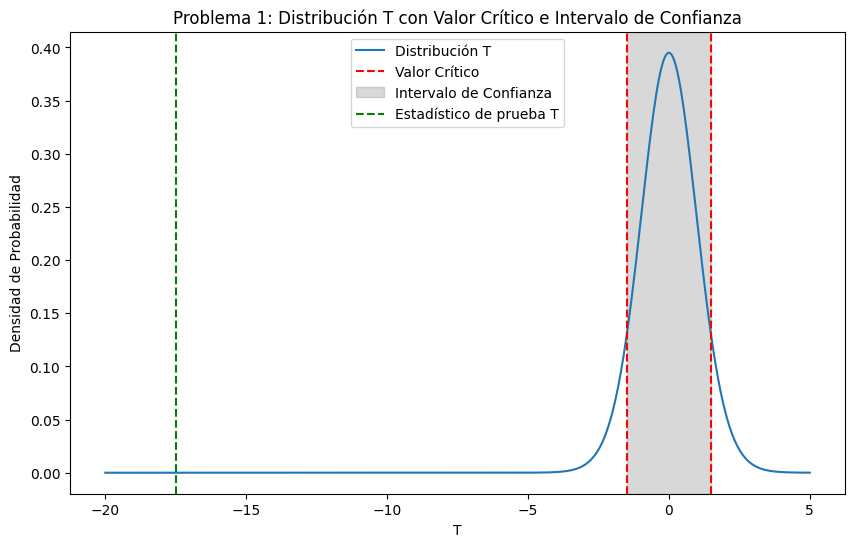

In [25]:
# Valores para la distribución T
x = np.linspace(-20, 5, 500)
y = t.pdf(x, df=degrees_freedom)

# Crear la figura y los ejes
plt.figure(figsize=(10, 6))
plt.plot(x, y, label=f'Distribución T')
plt.axvline(x=critical_value, color='red', linestyle='dashed', label='Valor Crítico')
plt.axvline(x=-critical_value, color='red', linestyle='dashed')

# Mostrar el intervalo de confianza
plt.axvspan(-critical_value, critical_value, alpha=0.3, color='gray', label='Intervalo de Confianza')

# Agregar el valor de la variable T
plt.axvline(x=T, color='green', linestyle='dashed', label='Estadístico de prueba T')

# Etiquetas y título
plt.xlabel('T')
plt.ylabel('Densidad de Probabilidad')
plt.title('Problema 1: Distribución T con Valor Crítico e Intervalo de Confianza')
plt.legend()

# Mostrar la gráfica
plt.show()

### Problema 4

Para el problema 4, consideraremos como hipótesis nula, que ambas universidades cuentan con el mismo tiempo promedio de busqueda de empleo, es decir:

> $H_0: \mu_1 = \mu_2$

Definimos los datos brindados por el problema (días de búsqueda de empleo y nivel de confianza)

In [26]:
# Datos de las muestras
data_universidad_a = [180, 200, 190, 210, 175, 185, 195, 180, 205, 190, 200, 185, 210, 175, 195]
data_universidad_b = [210, 215, 220, 225, 230, 215, 220, 225, 230, 235, 210, 215, 220, 225, 230, 235]

# Nivel de confianza
confidence_level = 0.95

Realizamos el cálculo de las varianzas muestrales

 > $S^2 = \frac{1}{n-1} \sum_{i=1}^{n} (x_i - \bar{x})^2$  
Donde:

>> $S^2$ es la varianza muestral.  
$n$ es el tamaño de la muestra.  
$x_i$ es cada valor individual en la muestra.  
$\overline{x}$ es la media de la muestra.

Para la universidad A:

> $S^2_A = \frac{1}{14} \left[(180-191.\overline{6})^2 + \cdots + (195-191.\overline{6})^2\right]= 138.09523809523813$

Para la universidad B:

> $S^2_B = \frac{1}{15} \left[(210-222.5)^2 + \cdots + (235-222.5)^2\right] = 66.\overline{6}$

In [27]:
variance_universidad_a = np.var(data_universidad_a, ddof=1)
variance_universidad_b = np.var(data_universidad_b, ddof=1)

Calculamos los grados de libertad:

> $V = \frac{\left( \frac{138.09}{15} + \frac{66.66}{16} \right)^2}{ \frac{\left( \frac{138.09}{15} \right)^2}{14} + \frac{\left( \frac{66.66}{16} \right)^2}{15}} = 24.79904545029167$

In [28]:
# Tamaños de las muestras
n_a = len(data_universidad_a)
n_b = len(data_universidad_b)

# Cálculo de grados de libertad
degrees_freedom_numerator = ((variance_universidad_a / n_a) + (variance_universidad_b / n_b))**2
degrees_freedom_denominator = (((variance_universidad_a / n_a)**2 / (n_a - 1)) + ((variance_universidad_b / n_b)**2 / (n_b - 1)))
degrees_freedom = degrees_freedom_numerator / degrees_freedom_denominator
print("Grados de libertad: ", degrees_freedom)

Grados de libertad:  24.79904545029167


Obtenemos el valor de nuestro estadístico de prueba $T$:

> $T = \frac{191.\overline{6} - 222.5}{\sqrt{\left( \frac{138.09}{15} + \frac{66.66}{16} \right)}} = -8.431518513947449$

Recordando que $H_0: \mu_1 = \mu_2$  

> $\Rightarrow \mu_1 - \mu_2 = 0$

In [29]:
# Medias muestrales
mean_universidad_a = np.mean(data_universidad_a)
mean_universidad_b = np.mean(data_universidad_b)

# Valor calculado de T
T = (mean_universidad_a - mean_universidad_b) / np.sqrt((variance_universidad_a / n_a) + (variance_universidad_b / n_b))
print("Variable de prueba T:", T)

Variable de prueba T: -8.431518513947449


Obtenemos el valor crítico de nuestra distribución T-student

In [30]:
critical_value = t.ppf((1 + confidence_level) / 2, degrees_freedom)
print('Valor crítico: ', critical_value)

Valor crítico:  2.0603851146644385


Una vez obtenido nuestro valor crítico, lo usamos para obtener nuestro intervalo de confianza

In [31]:
confidence_interval = (-critical_value, critical_value)
print("Intervalo de confianza: ", confidence_interval)

Intervalo de confianza:  (-2.0603851146644385, 2.0603851146644385)


Comprobamos que nuestro estadístico T se encuentre dentro de nuestro intervalo de confianza previamente calculado y validamos si se cumple o no la hipótesis nula $H_0$.

In [32]:
if confidence_interval[0] <= T <= confidence_interval[1]:
    print(f"Se acepta la hipótesis nula porque T = {T} está dentro del intervalo {confidence_interval}")
else:
    print(f"Se rechaza la hipótesis nula porque T = {T} está fuera del intervalo {confidence_interval}")


Se rechaza la hipótesis nula porque T = -8.431518513947449 está fuera del intervalo (-2.0603851146644385, 2.0603851146644385)


Realizamos un gráfico para mostrar de manera más visual los resultados obtenidos.

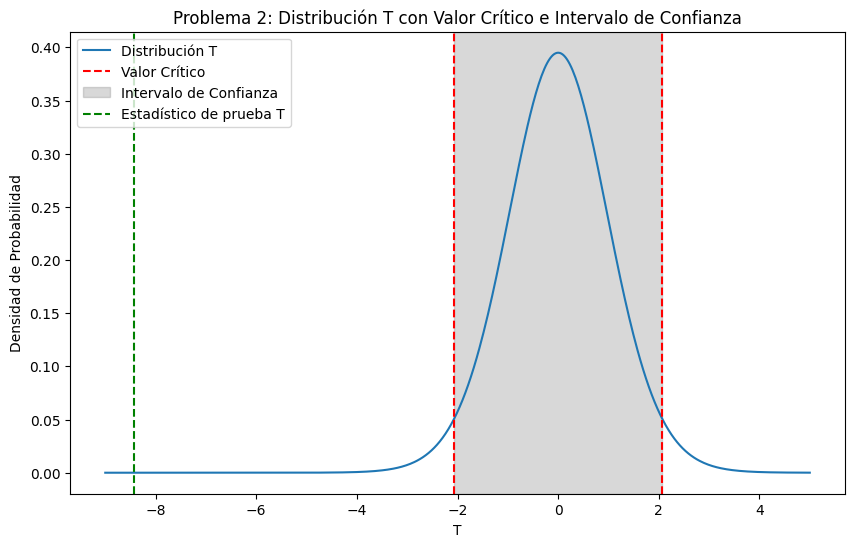

In [33]:
# Valores para la distribución T
x = np.linspace(-9, 5, 500)
y = t.pdf(x, df=degrees_freedom)

# Crear la figura y los ejes
plt.figure(figsize=(10, 6))
plt.plot(x, y, label=f'Distribución T')
plt.axvline(x=critical_value, color='red', linestyle='dashed', label='Valor Crítico')
plt.axvline(x=-critical_value, color='red', linestyle='dashed')

# Mostrar el intervalo de confianza
plt.axvspan(-critical_value, critical_value, alpha=0.3, color='gray', label='Intervalo de Confianza')

# Agregar el valor de la variable T
plt.axvline(x=T, color='green', linestyle='dashed', label='Estadístico de prueba T')

# Etiquetas y título
plt.xlabel('T')
plt.ylabel('Densidad de Probabilidad')
plt.title('Problema 2: Distribución T con Valor Crítico e Intervalo de Confianza')
plt.legend()

# Mostrar la gráfica
plt.show()